# 4 - Parametrics
This time, we'll skip the boring manual track creation process and create a set of parametric equations to describe our track. Aside from making track creation easier, it has the added benefit of making it possible to find the optimal path from any position using the parametric equations, allowing us to synthesize a lot of training data without having to drive through the simulation ourselves.

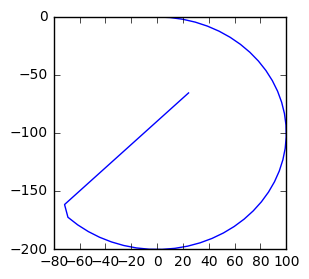

In [1]:
from konics import *
import numpy as np
import matplotlib.pyplot as plt

def x_t(t):
    if t > 4:
        return x_t(4) + t
    return np.sin(t)*100

def y_t(t):
    if t > 4:
        return y_t(4) + t
    return np.cos(t)*100 - 100

timesteps = np.linspace(0.0,100.0,num=1000)
x = [x_t(t) for t in timesteps]
y = [y_t(t) for t in timesteps]
plt.figure(figsize=(3,3))
plt.plot(x, y)
plt.show()

As shown above, the two parametric equations `x_t` and `y_t` define a semi-circular track with a linear section near the end. Note that the parametric equations do not have to be differentiable or even smooth, but if they aren't, you should manually inspect the track and make sure there aren't any weird artifacts. Now that we have our equations, we can use `make_track` (provided by the parametrics module) to construct a Track object.

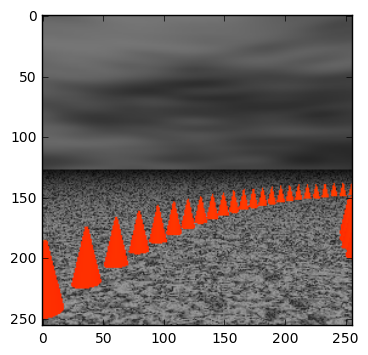

In [2]:
track = make_track(x_t, y_t, 40.0)
drive = Drive(track)
drive.position = start_pos(x_t, y_t)
plt.imshow(drive.render())
plt.show()

Note that different calls to `make_track` are likely to result in different results since the sky/ground textures are randonly selected and the cones along the track are randomly omitted.